# Subsetting using CLISOPS

The Python package [clisops](https://github.com/roocs/clisops) provides operators like `subset` and `regrid` based on [xarray](http://xarray.pydata.org/en/stable/) on climate model data (CMIP5, CMIP6, CORDEX, ATLAS).

You can install it with *conda*:
```
conda install -c conda-forge clisops
```

This example shows the usage of the `subset` operator with `time` and `area` parameters.

## Init Clisops

In [1]:
from clisops.ops.subset import subset
import xarray as xr

In [2]:
## Turn off warnings?
import warnings
warnings.simplefilter("ignore")

## Get CMIP6 data for testing

In [3]:
# Download from Copernicus data node
!wget -N https://data.mips.climate.copernicus.eu/thredds/fileServer/esg_c3s-cmip6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/tas/gn/v20190710/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc

--2024-09-04 14:52:51--  https://data.mips.climate.copernicus.eu/thredds/fileServer/esg_c3s-cmip6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/tas/gn/v20190710/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc
Resolving data.mips.climate.copernicus.eu (data.mips.climate.copernicus.eu)... 134.157.240.31
Connecting to data.mips.climate.copernicus.eu (data.mips.climate.copernicus.eu)|134.157.240.31|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc’ not modified on server. Omitting download.



In [4]:
ds = xr.open_mfdataset('tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc', use_cftime=True, combine="by_coords")

## Subset by time and area

Provide output as `xarray` object.

In [5]:
outputs = subset(
        ds=ds,
        time="2010-01-01T00:00:00/2010-12-31T00:00:00",
        area=(-40, -40, 70, 70),
        output_type="xarray",
    )

print(f"There is only {len(outputs)} output.")
outputs[0]

There is only 1 output.


<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lat: 118, lon: 117)
Coordinates:
  * time       (time) object 2010-01-16 12:00:00 ... 2010-12-16 12:00:00
  * lat        (lat) float64 -39.74 -38.81 -37.87 -36.93 ... 67.79 68.73 69.66
  * lon        (lon) float64 -39.38 -38.44 -37.5 -36.56 ... 67.5 68.44 69.38
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(118, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(117, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(12, 118, 117), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/acc42564-a31c-4675-8072-cbf3bf5fb2cf

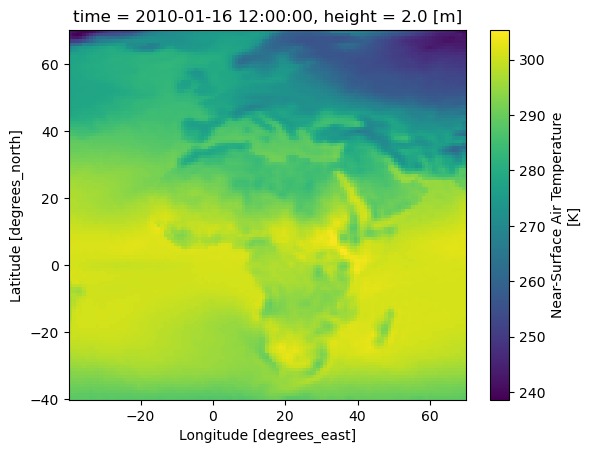

In [6]:
outputs[0].tas.isel(time=0).plot()

## Subset: Output to netCDF with standard namer

There is only one output as the file size is under the memory limit (1 GB) so does not need to be split.
This example uses the standard namer which names output files according to the input file and how it has been subsetted.

In [7]:
outputs = subset(
        ds=ds,
        time="2010-01-01T00:00:00/2010-12-31T00:00:00",
        area=(-40, -40, 70, 70),
        output_type="nc",
        # output_dir=".",
        # split_method="time:auto",
        file_namer="standard"
    )
outputs

['/Users/pingu/Documents/GitHub/macpingu/tgif_copernicus_clisops_21-11-12/notebooks/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_20100116-20101216.nc']

In [8]:
# To open the file

subset_ds = xr.open_mfdataset(outputs)
subset_ds

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lat: 118, lon: 117)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2010-12-16T12:00:00
  * lat        (lat) float64 -39.74 -38.81 -37.87 -36.93 ... 67.79 68.73 69.66
  * lon        (lon) float64 -39.38 -38.44 -37.5 -36.56 ... 67.5 68.44 69.38
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(118, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(117, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(12, 118, 117), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/acc42564-a31c-4675-8072-cbf3bf5fb2cf

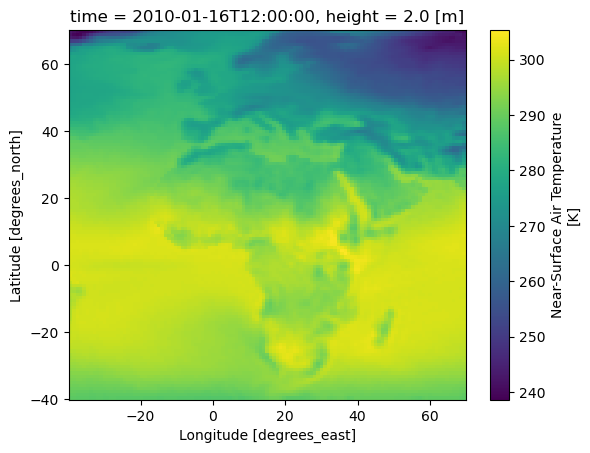

In [9]:
subset_ds.tas.isel(time=0).plot()